# Index


    1. Importing Libraries
    2. Downloading the Dataset
    3. Data Processing
            * Dropping Null Values
            * Checking The Churn Ratio
            * Converting the categorical value to numerical values
            * Splitting the dataset
            * Balancing the dataset using SMOTENC technique
            * Data Normalization
    4. Model Implementation       
            * Machine Learning Algorithm Selection
            * Model Implementation
    5. Feature Selection
            * Model Feature Importance
            * Recursive Feature Elimination 
    6. Hyper-parameter Tuning
            * Parameter tuning using GridSearchCV
    7. Final Model Implementation
    8. Saving Model
            
            

${}$

# Import Libraries

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from numpy import sort
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

${}$

# Downloading Dataset

In [2]:
data_url = "https://raw.githubusercontent.com/Ninjalemur/telecom_users/main/telecom_users.csv"
df = pd.read_csv(data_url, sep=",", skipinitialspace=True)
df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


${}$

# Data Processing

In [3]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [4]:
df=df.drop(columns=['customerID','Unnamed: 0'])

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [5]:
df=df.dropna()

${}$

## 1. Churn Ratio

In [6]:
df[df['Churn']=='Yes'].count()/df.count() *100

gender              26.556225
SeniorCitizen       26.556225
Partner             26.556225
Dependents          26.556225
tenure              26.556225
PhoneService        26.556225
MultipleLines       26.556225
InternetService     26.556225
OnlineSecurity      26.556225
OnlineBackup        26.556225
DeviceProtection    26.556225
TechSupport         26.556225
StreamingTV         26.556225
StreamingMovies     26.556225
Contract            26.556225
PaperlessBilling    26.556225
PaymentMethod       26.556225
MonthlyCharges      26.556225
TotalCharges        26.556225
Churn               26.556225
dtype: float64

${}$

## 2. Converting categorical value to numerical values

In [7]:
ordinalencoder = OrdinalEncoder()
df_categorical=df.select_dtypes(include='object').columns.tolist()

In [8]:
transformed_data=ordinalencoder.fit_transform(df[df_categorical])
transformed_data

array([[1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [1., 1., 1., ..., 1., 2., 0.],
       [1., 0., 0., ..., 1., 2., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [9]:
df[df_categorical]=transformed_data

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0,1.0,1.0,72,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,24.10,1734.65,0.0
1,0.0,0,0.0,0.0,44,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,88.15,3973.20,0.0
2,0.0,1,1.0,0.0,38,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,74.95,2869.85,1.0
3,1.0,0,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,55.90,238.50,0.0
4,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,53.45,119.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1.0,0,1.0,0.0,1,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,95.00,95.00,1.0
5982,0.0,0,1.0,1.0,23,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,91.10,2198.30,0.0
5983,1.0,0,1.0,1.0,12,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,21.15,306.05,0.0
5984,1.0,1,0.0,0.0,12,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.45,1200.15,1.0


${}$

## 3. Splitting Data

In [10]:
y=df.pop('Churn')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, random_state=42)

${}$

## 4. Data Balancing

Using Smote techquies to balance the dataset.

In [12]:
for x in range(len(X_train.columns.tolist())):
    print(X_train.columns.tolist()[x],x)

gender 0
SeniorCitizen 1
Partner 2
Dependents 3
tenure 4
PhoneService 5
MultipleLines 6
InternetService 7
OnlineSecurity 8
OnlineBackup 9
DeviceProtection 10
TechSupport 11
StreamingTV 12
StreamingMovies 13
Contract 14
PaperlessBilling 15
PaymentMethod 16
MonthlyCharges 17
TotalCharges 18


In [13]:
sm = SMOTENC(random_state=42, categorical_features=[0,2,3,5,6,7,8,9,10,11,12,13,14,15,16])
X_res, y_res = sm.fit_resample(X_train, y_train)

In [14]:
X_res

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,1,0.0,0.0,54,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,65.250000,3529.950000
1,1.0,0,1.0,1.0,27,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,75.750000,1929.000000
2,0.0,0,0.0,0.0,67,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,60.500000,3870.000000
3,1.0,0,0.0,0.0,2,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,86.000000,165.450000
4,0.0,0,0.0,0.0,30,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,100.200000,2983.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7887,0.0,1,0.0,0.0,4,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,81.360884,370.492164
7888,0.0,0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,78.069081,78.069081
7889,1.0,0,0.0,0.0,3,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,78.998945,232.296133
7890,1.0,0,0.0,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.836693,70.836693


${}$

## 5. Data Normalization

In [15]:
scaler = StandardScaler()
scaler.fit(X_res)

StandardScaler()

In [16]:
X_res[X_res.columns.tolist()]=scaler.transform(X_res)
X_test[X_test.columns.tolist()]=scaler.transform(X_test)

${}$

# Model Implementation

## 1.Algorithm Selection 

In [17]:
models = [
          ('Logistic Regression', LogisticRegression(n_jobs=-1)), 
          ('Random Forests', RandomForestClassifier(n_jobs=-1)),
          ('K Nearest Neighbors', KNeighborsClassifier(n_jobs=-1)),
          ('Support Vector Machines', SVC()), 
          ('XG Boost Classifier', XGBClassifier(n_jobs=-1)),
          ('LightGBM Classifier', lgb.LGBMClassifier(n_jobs=-1))
        ]


names = []
test_accuracy=[]
test_precision=[]
test_recall=[]
scoring=['accuracy','precision','recall']

for name, model in models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = cross_validate(model, X_res, y_res, cv=kfold, scoring=scoring,n_jobs=-1)
        names.append(name)
        test_accuracy.append(cv_results['test_accuracy'].mean())
        test_precision.append(cv_results['test_precision'].mean())
        test_recall.append(cv_results['test_recall'].mean())

In [18]:
df_model_selection=pd.DataFrame(list(zip(names,test_accuracy,test_precision,test_recall)),\
                                columns=['Algorithm','Accuracy','Precision','Recall'])

df_model_selection.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)

,Algorithm,Accuracy,Precision,Recall
0,Random Forests,0.843892,0.845734,0.841232
1,XG Boost Classifier,0.841612,0.832771,0.854759
2,LightGBM Classifier,0.841231,0.831002,0.856693
3,Support Vector Machines,0.818425,0.809032,0.833959
4,K Nearest Neighbors,0.799291,0.769381,0.855729
5,Logistic Regression,0.799037,0.778822,0.835709


Random Forests is giving the maximum Accuracy,Precision,Recall. We will move forward with this algorithm.

${}$

## 2. Model Implementation

In [19]:
rf_model=RandomForestClassifier(n_jobs=-1)
cv = KFold(n_splits=3, random_state=9400,shuffle=True)
n_scores = cross_val_score(rf_model, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [20]:
n_scores

array([0.84112505, 0.85822881, 0.83612167])

In [21]:
rf_model.fit(X_res,y_res)
predictions=rf_model.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       451
         1.0       0.54      0.57      0.56       147

    accuracy                           0.78       598
   macro avg       0.70      0.71      0.70       598
weighted avg       0.78      0.78      0.78       598



${}$

# Feature Selection

## Model Feature Importance

Text(0.5, 0, 'Random Forest Feature Importance')

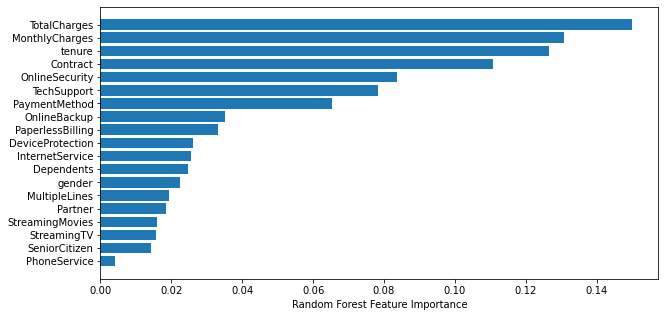

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(pd.DataFrame(X_res.columns)[0][sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

${}$

## 2. Feature selection using SelectKFeatures

In [23]:
df_importance=pd.DataFrame(list(zip(X_test.columns[sorted_idx],rf_model.feature_importances_[sorted_idx])) \
                           ,columns=['Features','Importance'])

df_importance.sort_values(by=['Importance'],ascending=False).reset_index(drop=True)

,Features,Importance
0,TotalCharges,0.149908
1,MonthlyCharges,0.130743
2,tenure,0.126533
3,Contract,0.110649
4,OnlineSecurity,0.083527
5,TechSupport,0.078242
6,PaymentMethod,0.065385
7,OnlineBackup,0.035258
8,PaperlessBilling,0.033278
9,DeviceProtection,0.026132


In [24]:
thresholds = rf_model.feature_importances_
thresholds.sort()
thresholds

array([0.00417695, 0.01419491, 0.01569968, 0.01588242, 0.01846601,
       0.0192482 , 0.02246573, 0.02456941, 0.02564043, 0.02613172,
       0.0332779 , 0.0352583 , 0.06538524, 0.0782424 , 0.08352743,
       0.11064925, 0.12653294, 0.13074316, 0.14990792])

In [25]:
accuracy_model=[]
no_features=[]

for thresh in thresholds:

    selection = SelectFromModel(rf_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_res)

    selection_model = RandomForestClassifier(n_jobs=-1)
    selection_model.fit(select_X_train, y_res)

    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    no_features.append(select_X_train.shape[1])
    accuracy_model.append(accuracy*100.0)

Thresh=0.004, n=19, Accuracy: 77.59%
Thresh=0.014, n=18, Accuracy: 77.26%
Thresh=0.016, n=17, Accuracy: 77.09%
Thresh=0.016, n=16, Accuracy: 76.42%
Thresh=0.018, n=15, Accuracy: 76.92%
Thresh=0.019, n=14, Accuracy: 77.09%
Thresh=0.022, n=13, Accuracy: 76.25%
Thresh=0.025, n=12, Accuracy: 75.92%
Thresh=0.026, n=11, Accuracy: 76.25%
Thresh=0.026, n=10, Accuracy: 76.09%
Thresh=0.033, n=9, Accuracy: 77.26%
Thresh=0.035, n=8, Accuracy: 75.08%
Thresh=0.065, n=7, Accuracy: 75.59%
Thresh=0.078, n=6, Accuracy: 75.59%
Thresh=0.084, n=5, Accuracy: 74.08%
Thresh=0.111, n=4, Accuracy: 71.24%
Thresh=0.127, n=3, Accuracy: 67.89%
Thresh=0.131, n=2, Accuracy: 70.07%
Thresh=0.150, n=1, Accuracy: 54.85%


In [26]:
df_model_accuracy=pd.DataFrame(list(zip(no_features,accuracy_model)),columns=['Number of Features','Accuracy'])

df_model_accuracy.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)

,Number of Features,Accuracy
0,19,77.591973
1,18,77.257525
2,9,77.257525
3,17,77.090301
4,14,77.090301
5,15,76.923077
6,16,76.421405
7,13,76.254181
8,11,76.254181
9,10,76.086957


Maximum accuracy is being achieved by using top 15 features. 

In [27]:
df_importance.sort_values(by=['Importance'],ascending=False).reset_index(drop=True).iloc[:15]['Features']

0         TotalCharges
1       MonthlyCharges
2               tenure
3             Contract
4       OnlineSecurity
5          TechSupport
6        PaymentMethod
7         OnlineBackup
8     PaperlessBilling
9     DeviceProtection
10     InternetService
11          Dependents
12              gender
13       MultipleLines
14             Partner
Name: Features, dtype: object

${}$

# Hyper-parameter Tuning

In [28]:
select_features=['TotalCharges',
 'tenure',
 'MonthlyCharges',
 'Contract',
 'OnlineSecurity',
 'TechSupport',
 'PaymentMethod',
 'PaperlessBilling',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'Dependents',
 'gender',
 'MultipleLines',
 'Partner']

In [29]:
X_hyper_train=X_res[select_features]
X_test=X_test[select_features]

In [30]:
X_hyper_train

,TotalCharges,tenure,MonthlyCharges,Contract,OnlineSecurity,TechSupport,PaymentMethod,PaperlessBilling,OnlineBackup,InternetService,DeviceProtection,Dependents,gender,MultipleLines,Partner
0,0.670954,1.091756,-0.085639,0.654633,-0.712589,1.743635,-1.757728,-1.454958,-0.853720,-1.299353,1.417976,-0.529273,0.978686,-1.040974,-0.852371
1,-0.056921,-0.030933,0.279904,-0.651653,-0.712589,-0.717820,-1.757728,0.687305,-0.853720,0.196562,-0.856781,1.889385,0.978686,1.055317,1.173198
2,0.825558,1.632310,-0.251004,0.654633,1.761020,1.743635,-0.726890,-1.454958,1.423636,-1.299353,-0.856781,-0.529273,-1.021778,-1.040974,-0.852371
3,-0.858723,-1.070460,0.636744,-0.651653,-0.712589,-0.717820,0.303948,0.687305,-0.853720,0.196562,-0.856781,-0.529273,0.978686,1.055317,-0.852371
4,0.422646,0.093810,1.131099,-0.651653,-0.712589,-0.717820,0.303948,0.687305,1.423636,0.196562,-0.856781,-0.529273,-1.021778,1.055317,-0.852371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7887,-0.765500,-0.987298,0.475240,-0.651653,-0.712589,-0.717820,0.303948,0.687305,1.423636,0.196562,-0.856781,-0.529273,-1.021778,1.055317,-0.852371
7888,-0.898451,-1.112041,0.360640,-0.651653,-0.712589,-0.717820,0.303948,-1.454958,-0.853720,0.196562,-0.856781,-0.529273,-1.021778,-1.040974,-0.852371
7889,-0.828331,-1.028879,0.393012,-0.651653,-0.712589,-0.717820,0.303948,0.687305,-0.853720,0.196562,-0.856781,-0.529273,0.978686,1.055317,-0.852371
7890,-0.901739,-1.112041,0.108854,-0.651653,-0.712589,-0.717820,0.303948,0.687305,-0.853720,0.196562,-0.856781,1.889385,0.978686,-1.040974,-0.852371


In [31]:
param_grid={
    'n_estimators':[100,200],
    'max_depth':[4,6],
    'min_samples_leaf': [3,4],
     'min_samples_split': [8,12] }

model=RandomForestClassifier(random_state=47)

In [32]:
grid_search=GridSearchCV(model,param_grid,n_jobs=-1,cv=3)
grid_search.fit(X_hyper_train,y_res)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=47), n_jobs=-1,
             param_grid={'max_depth': [4, 6], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 200]})

In [33]:
grid_search.best_params_


{'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 200}

In [34]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.397668,0.014205,0.045695,0.000984,4,3,8,100,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.728240,0.808438,0.828137,0.788272,0.043204,14
1,0.874242,0.037464,0.089539,0.003532,4,3,8,200,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.722539,0.811098,0.830418,0.788019,0.046968,16
2,0.453758,0.015086,0.043356,0.002371,4,3,12,100,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.728620,0.808438,0.828517,0.788525,0.043145,11
3,0.911230,0.039478,0.095282,0.011881,4,3,12,200,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.722919,0.811098,0.830418,0.788145,0.046791,15
4,0.455886,0.007972,0.043364,0.002312,4,4,8,100,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.729000,0.808438,0.828137,0.788525,0.042852,12
5,0.897607,0.016706,0.075108,0.012130,4,4,8,200,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.723299,0.811479,0.830418,0.788399,0.046677,13
6,0.447917,0.005185,0.056667,0.013123,4,4,12,100,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.729000,0.808438,0.828517,0.788652,0.042969,9
7,0.888118,0.031394,0.084071,0.004101,4,4,12,200,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.723679,0.811098,0.830798,0.788525,0.046553,10
8,0.510885,0.006047,0.046367,0.005142,6,3,8,100,"{'max_depth': 6, 'min_samples_leaf': 3, 'min_s...",0.719878,0.825162,0.844867,0.796636,0.054869,7
9,0.997195,0.034127,0.072361,0.005255,6,3,8,200,"{'max_depth': 6, 'min_samples_leaf': 3, 'min_s...",0.721019,0.827442,0.845247,0.797903,0.054849,3


${}$

# Final Model

In [35]:
final_model=RandomForestClassifier(max_depth= 6,
                                 min_samples_leaf= 4,
                                 min_samples_split= 12,
                                 n_estimators= 200)

final_model

RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=12,
                       n_estimators=200)

In [36]:
Kfold=KFold(n_splits=5,shuffle=True,random_state=3451)
cv_results=cross_validate(final_model,X_hyper_train,y_res,cv=kfold,scoring=scoring,n_jobs=-1)
print(cv_results['test_accuracy'].mean())
print(cv_results['test_precision'].mean())
print(cv_results['test_recall'].mean())
       

0.8125941640559594
0.7970418192065143
0.8393197973841398


In [37]:
final_model.fit(X_hyper_train,y_res)

RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=12,
                       n_estimators=200)

In [38]:
predictions=final_model.predict(X_test)

In [39]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       397
         1.0       0.71      0.55      0.62       201

    accuracy                           0.77       598
   macro avg       0.75      0.72      0.73       598
weighted avg       0.77      0.77      0.76       598



The accuracy to predict class 1 has imporved drastically.

${}$

# Saving Models

In [42]:
pickle.dump(final_model,open("random_forest_model.pkl","wb"))

In [43]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML('<style>.prompt {display: none}}</style>'))
